# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Libraries and Custome Functions](#libraries)
* [3. Data Preparation and Modeling](#modeling)
* [4. Training and Testing Model](#train-test-model)
* [5. Machine Learning](#machine-learning)
* [6. References and Sources](#references-sources)
* [7. Deployment](#deployment)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6Z5P2KvYmaRxD255EnkOa3WbBOAopIJA4nQ&usqp=CAU'/>
     
### Problem  Introduction and Motivation
>An airplane is the fastest mode of transport, many people who are traveling or going on a business trip choose airplane as their transportation. However, due to some unexpected issues, airplanes might not be able to depart and arrive at the scheduled time, resulting in delays. Delays of the flight is a lose-lose situation for both the airline companies and the passengers. We hope to build a model that help us predict flight delays and reduce the loss for the airline companies and the passengers. 
### Q & A
>**What is the prediction we are trying to make?**<br>
>We want to predict flights that are likely to be delayed.<br><br>
>**Why is it important?  Who cares?**<br>
>The delay of the flight can cause severe loss for both the airline company and the passenger. For the airline company, it has to reschedule the flight and might have to make compensation to the passengers. For the passengers, they have to reschedule their itinerary or business trip. So both airline companies and the passenger might care about our model prediction.<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>For the airline company, they can take action earlier when the prediction says that the flight might be delayed. With earlier action, it is more possible to reschedule the flight and reduce the possiblity of making compensation to the passengers. For the passengers, they can use the prediction to help them decide which flight they are going to take. They can take flights that are less likely to be delayed and make sure their trips are on schedule.<br><br>

# 2. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [20]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

pd.options.display.float_format = '{:.2f}'.format
# ask pandas to display float values to two decimal places.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn import metrics
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.linear_model import LinearRegression
# LinearRegression contains different functions for performing machine learning with linear models.

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# NearestNeighbors function helps us finding he nearest neighbors between two sets of data, KNeighborsClassifier
# implements the k-nearest neighbors vote.

In [21]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [22]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [23]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1": F1,
                          })

    # Let's look at our dataframe
    return result

# 3.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [24]:
df = pd.read_csv('FlightDelays_Clean.csv')
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.

pd.set_option('display.max_columns', None)
# Setting the max row number we want to display, the default is 10 and if we set the value as None, it will display
# all the rows.

df.info()
# Look at the information of the data frame.

df.tail()
# Look at the last 5 records of the data frame.

# df.head()
# Look at the first 5 records of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status_delayed       2201 non-null   int64  
 1   sch_dep_time         2201 non-null   float64
 2   carrier_delta        2201 non-null   int64  
 3   carrier_us           2201 non-null   int64  
 4   carrier_envoy        2201 non-null   int64  
 5   carrier_continental  2201 non-null   int64  
 6   carrier_discovery    2201 non-null   int64  
 7   carrier_other        2201 non-null   int64  
 8   dest_jfk             2201 non-null   int64  
 9   dest_ewr             2201 non-null   int64  
 10  dest_lga             2201 non-null   int64  
 11  distance             2201 non-null   int64  
 12  origin_dca           2201 non-null   int64  
 13  origin_iad           2201 non-null   int64  
 14  origin_bwi           2201 non-null   int64  
 15  bad_weather          2201 non-null   i

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


>**Initail evaluations and observations of the data**<br>
>>**Records:** 2201 (since starting from 0 to 2200)<br>
>>**Features in current data(total 23 features):** status_delayed, sch_dep_time, carrier_delta, carrier_us, carrier_envoy, carrier_continental, carrier_discovery, carrier_other, dest_jfk, dest_ewr, dest_lga, distance, origin_dca, origin_iad, origin_bwi, bad_weather, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday<br>
>>**Potential features that we can add in the future:** month, engine type, aircraft type, total flight hours of the pilot<br>
>>**Data Type:** Reasonable(the actual data type is same as we expected)<br>
>>**Target Feature:** status_delayed
<br><br>

| Feature             | Thoughts/Expectations(impact on status_delayed)     |ActualData Type| Expected Data Type |
|---------------------|-----------------------------------------------------|---------------|--------------------|
| status_delayed:     | the delayed status(target variable)                 | int64         | int                |
| sch_dep_time:       | scheduled departure time of the airplane(neutral)   | float64       | float              |
| carrier_delta:      | delta airline(neutral) 	                            | int64         | int                |
| carrier_us:         | us airline(neutral)   	                            | int64         | int                | 
| carrier_envoy: 	  | envoy airline(neutral)                              | int64         | int                |
| carrier_continental:| continental airline(neutral)                        | int64         | int                |
| carrier_discovery:  | discovery airline(neutral)                          | int64         | int                |
| carrier_other:      | other airlines(neutral)                             | int64         | int                |
| dest_jfk:           | the destination of the route is jfk airport(nuetral)| int64         | int                |
| dest_ewr:           | the destination of the route is ewr airport(neutral)| int64         | int                |
| dest_lga:           | the destination of the route is lga airport(neutral)| int64         | int                |
| distance:           | the distance of the route(+)          	            | int64         | int                |
| origin_dca:    	  | the origin of the route is dca airport(neutral)     | int64         | int                |
| origin_iad:         | the origin of the route is iad airport(neutral)     | int64         | int                |
| origin_bwi:         | the origin of the route is bwi airport(neutral)     | int64         | int                |
| bad_weather:        | is there a bad weather during the flight?(++)       | int64         | int                |
| Monday:             | the flight is on Monday(neutral)                    | int64         | int                |
| Tuesday:            | the flight is on Tusday(neutral)                    | int64         | int                |
| Wednesday:          | the flight is on Wednesday(neutral)                 | int64         | int                |
| Thursday:           | the flight is on Thursday(neutral)                  | int64         | int                |
| Friday:             | the flight is on Friday(neutral)                    | int64         | int                |
| Saturday:           | the flight is on Saturday(neutral)                  | int64         | int                |
| Sunday:             | the flight is on Sunday(neutral)                    | int64         | int                |

>**Initial assumptions of the meaning of 1 and 0 for the binary variables:**<br>

| Feature               | Assumptions for 1              | Assumptions for 0                  |
|-----------------------|--------------------------------|------------------------------------|
| status_delayed:       | delayed                        | not delayed                        | 
| carrier_delta:        | is delta airline               | isn't delata airline               |
| carrier_us:           | is us airline	                 | isn't us airline                   | 
| carrier_envoy:        | is envoy airline  	         | isn't envoy airline                |
| carrier_continental: 	| is continental airline         | isn't continental airline          | 
| carrier_discovery:    | is discovery airline           | isn't discovery airline            | 
| carrier_other:        | is other airlines              | isn't other airlines               |
| dest_jfk              | destination is jfk airport     | destination isn't jfk airport      |
| dest_ewr:             | destination is ewr airport     | destination isn't ewr airport      |
| dest_lga:             | destiantion is lga airport     | destination isn't lga airport      |
| origin_dca:           | origin is dca airport          | origin isn't dca airport           |
| origin_iad:           | origin is iad airport          | origin isn't iad airport           |
| origin_bwi:           | origin is bwi airport          | origin isn't bwi airport           |
| bad_weather:          | has a bad weather              | do not has a bad weather           |
| Monday:               | flight is on Monday            | flight is not on Monday            |
| Tuesday:              | flight is on Tuesday           | flight is not on Tuesday           |
| Wednesday:            | flight is on Wednesday         | flight is not on Wednesday         |
| Thursday:             | flight is on Thursday          | flight is not on Thursday          |
| Friday:               | flight is on Friday            | flight is not on Friday            |
| Saturday:             | flight is on Saturday          | flight is not on Saturday          |
| Sunday:               | flight is on Sunday            | flight is not on Sunday            |

In [25]:
# Removing duplicates and compare the number of records before and after removing duplicates.
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

# finding the total missing values for each column
df.isnull().sum()

Number of records: 2201
Number of records after dropping dupes: 2201


status_delayed         0
sch_dep_time           0
carrier_delta          0
carrier_us             0
carrier_envoy          0
carrier_continental    0
carrier_discovery      0
carrier_other          0
dest_jfk               0
dest_ewr               0
dest_lga               0
distance               0
origin_dca             0
origin_iad             0
origin_bwi             0
bad_weather            0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
Friday                 0
Saturday               0
Sunday                 0
dtype: int64

>**Initail cleanup summary**<br><br>
*No duplicates in our data frame*<br><br>
*No missing values in our data frame*<br>

In [26]:
# Identify all the numeric columns in the data frame and then show some statistics, we transpose the data frame by
# adding .T at the end
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,2201.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
sch_dep_time,2201.00,13.86,4.32,6.00,10.00,14.92,17.17,21.50
carrier_delta,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
carrier_us,2201.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
carrier_envoy,2201.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
carrier_continental,2201.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
carrier_discovery,2201.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
carrier_other,2201.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
dest_jfk,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,2201.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


>**Feature observation:**<br><br>
>1. All of the features are numerical variables.
>2. All the feature seems to be binary except sch_dep_time and distance.
>3. Looking at the mean of the status_delayed, we realize that in the data frame, about 19.4 percent of flights are delayed.
>4. Looking at the mean of carrier_delta, we realize that in the data frame, about 18 percent of the flight belongs to delta airline.
>5. Looking at the mean of carrier_us, we realize that in the data frame, about 18 percent of the flight belongs to us airline.
>6. Looking at the mean of carrier_envoy, we realize that in the data frame, about 13 percent of the flight belongs to envoy airline.
>7. Looking at the mean of carrier_continental, we realize that in the data frame, about 4 percent of the flight belongs to continental airline.
>8. Looking at the mean of carrier_discovery, we realize that in the data frame, about 25 percent of the flight belongs to discovery airline.
>9. Looking at the mean of carrier_other, we realize that in the data frame, about 21 percent of the flight belongs to other airlines.
>10. Looking at the mean of dest_jfk, we realize that in the data frame, about 18 percent of the flight's destination is jfk airport.
>11. Looking at the mean of dest_ewr, we realize that in the data frame, about 30 percent of the flight's destination is ewr airport.
>12. Looking at the mean of dest_lga, we realize that in the data frame, about 52 percent of the flight's destination is lga airport.
>13. Looking at the mean of origin_dca, we realize that in the data frame, about 62 percent of the flight's origin is dca airport.
>14. Looking at the mean of origin_iad, we realize that in the data frame, about 31 percent of the flight's origin is iad airport.
>15. Looking at the mean of origin_bwi, we realize that in the data frame, about 7 percent of the flight's origin is bwi airport.
>16. Looking at the mean of bad_weather, we realize that in the data frame, there is about 1 percent to have a bad weather during the flight.
>17. Looking at the mean of Monday, we realize that in the data frame, about 14 percent of the flight is on Monday.
>18. Looking at the mean of Tuesday, we realize that in the data frame, about 15 percent of the flgiht is on Tuesday.
>19. Looking at the mean of Wednesday, we realize that in the data frame, about 17 percent of the flight is on Wednesday.
>20. Looking at the mean of Thursday, we realize that in the data frame, about 18 percent of the flight is on Thursday.
>21. Looking at the mean of Friday, we realize that in the data frame, about 11 percent of the flight is on Friday.
>22. Looking at the mean of Saturday, we realize that in the data frame, about 11 percent of the flight is on Saturday.
>23. Looking at the mean of Sunday, we realize that in the data frame, about 14 percent of the flight is on Sunday.

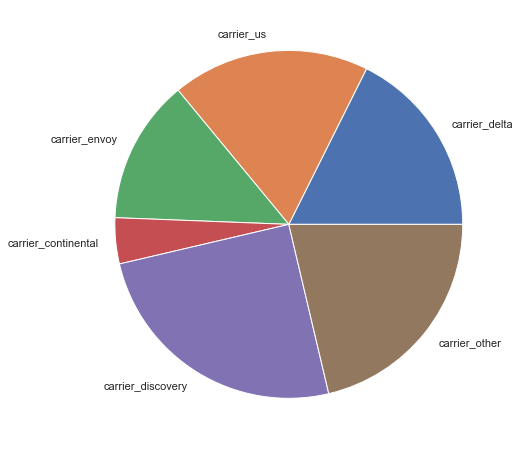

In [27]:
# Creating a pie chart for the carrier features to see the their proportions.
y = np.array([0.176284, 0.183553, 0.134030, 0.042708, 0.250341, 0.213085])
carriers = ["carrier_delta", "carrier_us", "carrier_envoy", "carrier_continental", "carrier_discovery", "carrier_other"]
plt.pie(y, labels = carriers)
plt.show()

>**Further investigation of carrier features:**<br><br>
>1. The sum of the means of all carrier features is 0.176284 + 0.183553 + 0.134030 + 0.042708 + 0.250341 + 0.213085 = 1.0000001.
>2. The above result is very close to 1 so we can conclude that each data row matches a carrier feature.
>3. The proportion of the continental carrier is relatively low compared to other carriers.

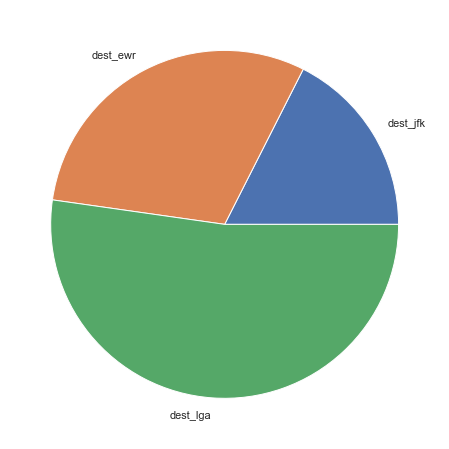

In [28]:
# Creating a pie chart for the destination features to see the their proportions.
y = np.array([0.175375, 0.302135, 0.522490])
destination = ["dest_jfk", "dest_ewr", "dest_lga"]
plt.pie(y, labels = destination)
plt.show()

>**Further investigation of destination features:**<br><br>
>1. The sum of the means of all destination features is 0.175375 + 0.302135 + 0.522490 = 1.
>2. The above result is exactly eqauls to 1 so we can conclude that each data row matches a destination feature.
>3. The proportion of the lga airport is relatively high compared to other airports.

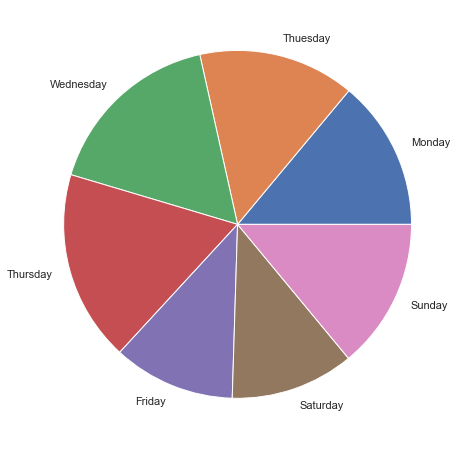

In [29]:
# Creating a pie chart for the week features to see the their proportions.
y = np.array([0.139482, 0.145388, 0.169014, 0.177647, 0.113585, 0.114948, 0.139936])
weeks = ["Monday", "Thuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.pie(y, labels = weeks)
plt.show()

>**Further investigation of week features:**<br><br>
>1. The sum of the means of all week features is 0.139482 + 0.145388 + 0.169014 + 0.177647 + 0.113585 + 0.114948 + 0.139936 = 0.999424.
>2. The above result is very close to 1 so we can conclude that each data row matches a day in a week.
>3. The proportion of each dat in a week seems to be similar.

In [30]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['status_delayed', 'sch_dep_time', 'carrier_delta', 'carrier_us', 'carrier_envoy', 'carrier_continental', 'carrier_discovery', 
'carrier_other', 'dest_jfk', 'dest_ewr', 'dest_lga', 'distance', 'origin_dca', 'origin_iad', 'origin_bwi', 'bad_weather', 'Monday', 'Tuesday', 
'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
status_delayed,0.19,0.00,0.40,0.00,1.00,True
sch_dep_time,13.86,14.92,4.32,6.00,21.50,False
carrier_delta,0.18,0.00,0.38,0.00,1.00,True
carrier_us,0.18,0.00,0.39,0.00,1.00,True
carrier_envoy,0.13,0.00,0.34,0.00,1.00,True
carrier_continental,0.04,0.00,0.20,0.00,1.00,True
carrier_discovery,0.25,0.00,0.43,0.00,1.00,False
carrier_other,0.21,0.00,0.41,0.00,1.00,False
dest_jfk,0.18,0.00,0.38,0.00,1.00,True
dest_ewr,0.30,0.00,0.46,0.00,1.00,False


<AxesSubplot:xlabel='status_delayed'>

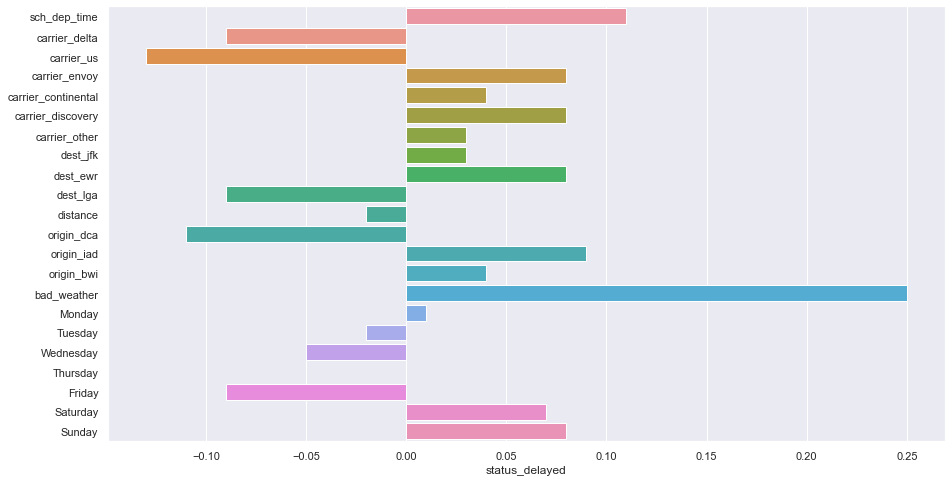

In [31]:
# Find the correlations between our target variable and the remaining numerical features.
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing.
a = df[numerical_vars].corr()[['status_delayed']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.status_delayed[1:],y=a.index[1:],data=a, orient='h')

> **Initial evaluations and observations of numerical features by using barchart:**<br><br>
>The correlations status_delayed and other features:
>1. sch_dep_time (+): Not as we expected. Maybe it is because as the sch_dept_time increases, it is more close to midnight, and the visibility is getting worse. So it will be harder for the pilot to fly and spot possible obstructions.
>2. carrier_delta (-): Not as we expected. Delta airline seems to be less likely to have delays on their flights.
>3. carrier_us (-): Not as we expected. US airline seems to be less likely to have delays on their flights.
>4. carrier_envoy (+): Not as we expected. Envoy airline seems to be more likely to have delays on their flights.
>5. carrier_continental (+): Not as we expected. Continental airline seems to be more likely to have delays on their flights.
>6. carrier_discovery (+): Not as we expected. Discovery airline seems to be more likely to have delays on their flights.
>7. carrier_other (+): Not as we expected. Other airlines seems to be more likely to have delays on their flights.
>8. dest_jfk (+): Not as we expected. Flights with destination of jfk airport seems more likely to delay.
>9. dest_ewr (+): Not as we expected. Flights with destination of ewr airport seems more likely to delay.
>10. dest_lga (-): Not as we expected. Flights with destination of lga airport seems less likely to delay.
>11. distance (-): Opposite as we expected. Maybe it is because shorter distance means it is more likely to be a domestic flight. For domestic flight, due to the density of flgiht route in domestic, airlines might need to reschedule the time to avoid overlapping with other arlines.
>12. origin_dca (-): Not as we expected. Flights with origin of dca airport seems less likely to delay.
>13. origin_iad (+): Not as we expected. Flights with origin of iad airport seems more likely to delay.
>14. origin_bwi (+): Not as we expected. Flights with origin of bwi airport seems more likely to delay.
>15. bad_weather (+): Same as we expected. The bad weather reduces the visibilty or force the pilot to route around the intense storm system, which can make the flight last longer, contributing to delays.
>16. Monday (+): Not as we expected. Maybe people going on a business trip tends to take the flight on Monday.
>17. Thuesday (-): Not as we expected. Maybe people are less likely to travel during weekdays. With less flights in the weekdays, it is less likely to cause a delay of flight.
>18. Wednesday (-): Not as we expected. Maybe people are less likely to travel during weekdays. With less flights in the weekdays, it is less likely to cause a delay of flight.
>19. Thursday (?): We can't tell whether the correlation positive or negative. Maybe it is because the correlation the value of correlation is too small. We will take a further look later.
>20. Friday (-): Not as we expected. Maybe people are less likely to travel during weekdays. With less flights in the weekdays, it is less likely to cause a delay of flight.
>21. Saturday (+): Not as we expected. Maybe people are more likely to travel in weekends. With more flights in the weekends, it is more likely to cause a delay of flight.
>22. Sunday (+): Not as we expected. Maybe people are more likely to travel in weekends. With more flights in the weekends, it is more likely to cause a delay of flight.

In [32]:
# Take a closer look of the correlation between 'status_delayed' and 'Thursday'.
df['status_delayed'].corr(df['Thursday'])

-0.0031016694844017063

>**Result of the correlation between 'status_delayed' and 'Thursday':**<br>
The correlation between 'status_delayed' and 'Thursday' is -0.0031016694844017063. The value is relatively small compared to the scale of our barchart above, making it difficult to distinguish the correlation.

# 4.Training and Testing Model<a class="anchor" id="train-test-model"></a>
* [Go to Top](#table-of-content)

> **Data Partitioning:** <a class="anchor" id="data-split"></a>
<br><br>
>**To Do**:
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [33]:
# predictors = ['sch_dep_time', 'carrier_delta', 'carrier_us', 'carrier_envoy', 'carrier_continental', 'carrier_discovery', 
# 'carrier_other', 'dest_jfk', 'dest_ewr', 'dest_lga', 'distance', 'origin_dca', 'origin_iad', 'origin_bwi', 'bad_weather', 'Monday', 'Tuesday', 
# 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
target = ['status_delayed']

# X = df[predictors]
X = df.drop(target,axis=1) 
# Putting all the features except our target feature into X

y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization:** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [34]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 5.Machine Learning<a class="anchor" id="machine-learning"></a>
- [X] [kNN Model](#knn-model)
- [X] [Logistic Model](#logistic-model)
- [X] [Winning Model](#decision)
* [Go to Top](#table-of-content)

> **kNN Model:** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. kNN(k-nearest neighbors) works by finding distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.
>2. Fit numerous kNN models using different values for k. <br>
>3. We use odd values for k to avoid two feaures getting the same number.
>2. Choose the "best" value for "k" based on Accuracy.

In [35]:
# Train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put TN, TP, FN, FP, Precision, Recall, F1, Accuracy in results object
    results.append({'k':k,
                    'TP':metrics.confusion_matrix(y_test, y_pred_class)[1,1],
                    'TN':metrics.confusion_matrix(y_test, y_pred_class)[0,0],
                    'FP':metrics.confusion_matrix(y_test, y_pred_class)[0,1],
                    'FN':metrics.confusion_matrix(y_test, y_pred_class)[1,0],
                    'Precison':metrics.precision_score(y_test, y_pred_class).round(3),
                    'Recall':metrics.recall_score(y_test, y_pred_class).round(3),
                    'Accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'F1':metrics.f1_score(y_test, y_pred_class).round(2),
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,TP,TN,FP,FN,Precison,Recall,Accuracy,F1
0,1,45,452,83,81,0.35,0.36,0.75,0.35
1,3,33,480,55,93,0.38,0.26,0.78,0.31
2,5,22,507,28,104,0.44,0.17,0.80,0.25
3,7,20,503,32,106,0.39,0.16,0.79,0.22
4,9,14,515,20,112,0.41,0.11,0.80,0.18
5,11,14,517,18,112,0.44,0.11,0.80,0.18
6,13,10,515,20,116,0.33,0.08,0.79,0.13
7,15,10,523,12,116,0.46,0.08,0.81,0.14
8,17,9,526,9,117,0.50,0.07,0.81,0.12
9,19,9,526,9,117,0.50,0.07,0.81,0.12


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 15 as this is the lowest value that achieves the highest accuracy value.<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.

In [36]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.83
Testing data Accuracy: 0.81


In [37]:
# Performance measurements of kNN Model
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.10,107,190,345,19,0.24,0.85,0.45,0.37
2,0.20,92,279,256,34,0.26,0.73,0.56,0.39
3,0.30,44,448,87,82,0.34,0.35,0.74,0.34
4,0.40,32,492,43,94,0.43,0.25,0.79,0.32
5,0.50,10,523,12,116,0.46,0.08,0.81,0.14
6,0.60,7,531,4,119,0.64,0.06,0.81,0.10
7,0.70,7,535,0,119,1.00,0.06,0.82,0.11
8,0.80,7,535,0,119,1.00,0.06,0.82,0.11
9,0.90,7,535,0,119,1.00,0.06,0.82,0.11


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy and Testing data Accuracy are close in Logistic Model so we don't need to worry about overfitting.

>**Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>Let's produce the same table above but this time using a Logistic Model.

In [38]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


In [39]:
# Performance measurements of Logistic Model
class_perf_measures(lr_model,X_test,y_test)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.10,111,142,393,15,0.22,0.88,0.38,0.35
2,0.20,74,342,193,52,0.28,0.59,0.63,0.38
3,0.30,39,472,63,87,0.38,0.31,0.77,0.34
4,0.40,15,520,15,111,0.50,0.12,0.81,0.19
5,0.50,8,534,1,118,0.89,0.06,0.82,0.12
6,0.60,7,535,0,119,1.00,0.06,0.82,0.11
7,0.70,7,535,0,119,1.00,0.06,0.82,0.11
8,0.80,7,535,0,119,1.00,0.06,0.82,0.11
9,0.90,7,535,0,119,1.00,0.06,0.82,0.11


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy and Testing data Accuracy are the same for Logistic Model so we don't need to worry about overfitting.

>**Choosing the winning model between kNN an Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>1. Testing data Accuracy of the two models are really close, it is hard to decide winning model based on the results above.<br>
>2. Let's try to use AUC to help us decide the winning model.

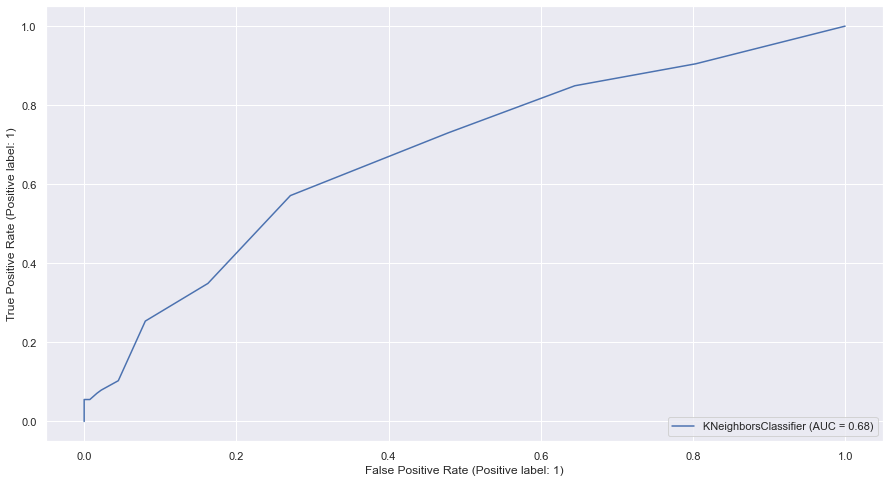

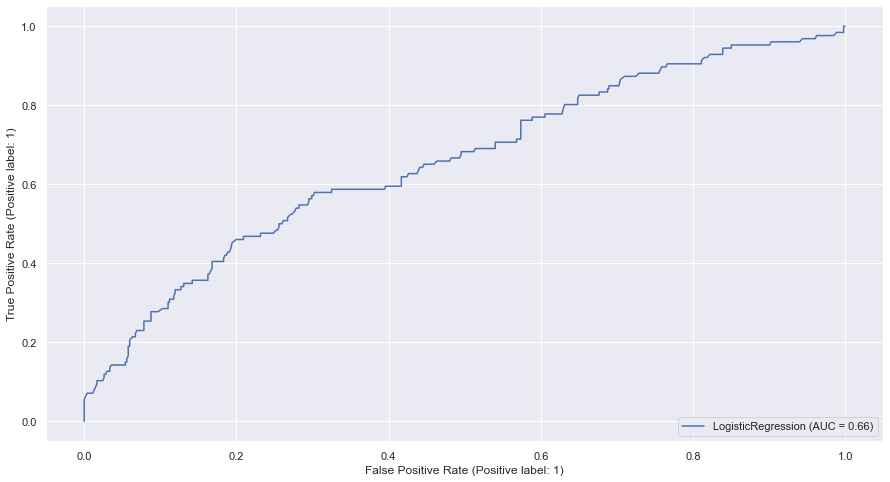

In [19]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<a class="anchor" id="decision"></a>
<br>
AUC is higher for our kNN Model so I will use that model to further evaluate probability thresholds and corresponding performance measures.

In [40]:
# Performance measurements of kNN Model(Winning Model)
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.10,107,190,345,19,0.24,0.85,0.45,0.37
2,0.20,92,279,256,34,0.26,0.73,0.56,0.39
3,0.30,44,448,87,82,0.34,0.35,0.74,0.34
4,0.40,32,492,43,94,0.43,0.25,0.79,0.32
5,0.50,10,523,12,116,0.46,0.08,0.81,0.14
6,0.60,7,531,4,119,0.64,0.06,0.81,0.10
7,0.70,7,535,0,119,1.00,0.06,0.82,0.11
8,0.80,7,535,0,119,1.00,0.06,0.82,0.11
9,0.90,7,535,0,119,1.00,0.06,0.82,0.11


>**Interpretations of the Confusion Matrix(Flight Delay):**
<br>
>1. Threshold: Indicates the smallest value the predicted probability must have for that record to be assigned to the positive class(1).<br>
>2. TP(True Positive): Predict the flight will delay and the flight actually delay.<br>
>3. TN(True Negative): Predict the flight will not delay and the flight actually do not delay.<br>
>4. FP(False Positive): Predict the flight will delay but the flight actaully do not delay.<br>
>5. FN(False Negative): Predict the flight will not delay but the flight actually delay.<br>
>6. Precison: TP/(TP+FP)
>7. Recall: TP/(TP+FN)
>8. Accuracy: (TP+TN)/n
>9. ErrorRate: (FP+FN)/n
>10. n = TP + TN + FP + FN = 661

1. **Prob Threshold = 0.2**:
    - Prob Thresold = 0.2 means that the predicted probabiltiy must be greater or equal to 0.2 for that record to be assigned to positive class(1). 1 in this confusion matrix means flight delay.
    - Number of False Positives(FP): 256
    - 256 means that there are 256 times when model predict the flight will delay but the flight actaully do not delay. 
    - In the real world, FP might not be costly. Based on the model prediction, the airline company will reschedule the departure and arrival time of the flight. But since the flight do not delay, there will be a longer period of time that the airplane is waiting in the airport for the next flight. With more time waiting in the airport means that the airplane has less time to carry people and thus reducing the revenue from the tickets. Although the company will reduces its revenue, it can avoid making compensation for the flight delay and earn a good reputation for being punctual.
    - Number of False Negatives(FN): 34
    - 34 means that there are 34 times when model predict the flight will not delay but the flight actually delay.
    - In the real world, FN might be very costly. Based on the model prediction, the airline company will not take any action until they find out that the flight is going to dealy. It will be hard for the airline company to reschedule the flights in a short time and deal with the passengers' issues. What's more, the airline company might need to make compensations to the passengers.
<br><br>
2. **Prob Threshold = 0.6**:
    - Prob Thresold = 0.6 means that the predicted probabiltiy must be greater or equal to 0.6 for that record to be assigned to positive class(1). 1 in this confusion matrix means flight delay.
    - Number of False Positives(FP): 4
    - 4 means that there are 4 times when model predict the flight will delay but the flight actaully do not delay. 
    - In the real world, FP might not be costly. Based on the model prediction, the airline company will reschedule the departure and arrival time of the flight. But since the flight do not delay, there will be a longer period of time that the airplane is waiting in the airport for the next flight. With more time waiting in the airport means that the airplane has less time to carry people and thus reducing the revenue from the tickets. Although the company will reduces its revenue, it can avoid making compensation for the flight delay and earn a good reputation for being punctual.
    - Number of False Negatives(FN): 119
    - 119 means that there are 119 times when model predict the flight will not delay but the flight actually delay.
    - In the real world, FN might be very costly. Based on the model prediction, the airline company will not take any action until they find out that the flight is going to dealy. It will be hard for the airline company to reschedule the flights in a short time and deal with the passengers' issues. What's more, the airline company might need to make compensations to the passengers.
<br><br>
3. **Prob Threshold = 0.8**:
    - Prob Thresold = 0.8 means that the predicted probabiltiy must be greater or equal to 0.8 for that record to be assigned to positive class(1). 1 in this confusion matrix means flight delay.
    - Number of False Positives(FP): 0
    - 0 means that there are 0 times when model predict the flight will delay but the flight actaully do not delay. 
    - In the real world, FP might not be costly. Based on the model prediction, the airline company will reschedule the departure and arrival time of the flight. But since the flight do not delay, there will be a longer period of time that the airplane is waiting in the airport for the next flight. With more time waiting in the airport means that the airplane has less time to carry people and thus reducing the revenue from the tickets. Although the company will reduces its revenue, it can avoid making compensation for the flight delay and earn a good reputation for being punctual.
    - Number of False Negatives(FN): 119
    - 119 means that there are 119 times when model predict the flight will not delay but the flight actually delay.
    - In the real world, FN might be very costly. Based on the model prediction, the airline company will not take any action until they find out that the flight is going to dealy. It will be hard for the airline company to reschedule the flights in a short time and deal with the passengers' issues. What's more, the airline company might need to make compensations to the passengers.
<br><br>
4. **Final Decision for Prob Threshold:**
   - Our final decision for Prob Threshold is 0.2.
   - In this case, False Negatives(FN) are more costly than False Positives(FP). So we are focusing on making False Negative number as small as possible, and the 0.2 threshold has the lowest number of False Negatives among the three thresholds above.

# 6.References and Sources<a class="anchor" id="references-sources"></a>
* [Go to Top](#table-of-content)

>1. **Picture in Problem Introduction and Movitation:** https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6Z5P2KvYmaRxD255EnkOa3WbBOAopIJA4nQ&usqp=CAU<br>
>2. **Why is My Flight Delayed? The 20 Main Reasons for Flight Delays:** https://www.claimcompass.eu/blog/why-is-my-flight-delayed/
>3. **If You Want to Avoid Delays, This Is the Best Time of the Day to Fly:** https://www.rd.com/article/avoid-delays-best-time-day-to-fly/
>4. **Machine Learning Basics with the K-Nearest Neighbors Algorithm** https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

# 7.Deployment<a class="anchor" id="deployment"></a>
* [Go to Top](#table-of-content)

>**Deployment using dash:**<a class="anchor" id="deployment"></a>
<br>
According to the above case, False Negatives(FN) are more costly than False Positives(FP). So we want to create a app to help people find out the number of False Negatives for different thresholds.

In [1]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div(
    [
        html.H1('False Negatives Numbers for different thresholds：'),
        html.Br(),
        dcc.Dropdown(
            id='threshold',
            options=[
                {'label': '0.00', 'value': '0.00'},
                {'label': '0.10', 'value': '0.10'},
                {'label': '0.20', 'value': '0.20'},
                {'label': '0.30', 'value': '0.30'},
                {'label': '0.40', 'value': '0.40'},
                {'label': '0.50', 'value': '0.50'},
                {'label': '0.60', 'value': '0.60'},
                {'label': '0.70', 'value': '0.70'},
                {'label': '0.80', 'value': '0.80'},
                {'label': '0.90', 'value': '0.90'},
                {'label': '1.00', 'value': '1.00'},
            ],
            value='0.00'
        ),
        html.P(id='parent')
    ]
)

threshold_dict = {
    '0.00': '0',
    '0.10': '19',
    '0.20': '34',
    '0.30': '82',
    '0.40': '94',
    '0.50': '116',
    '0.60': '119',
    '0.70': '119',
    '0.80': '119',
    '0.90': '119',
    '1.00': '119',
}

@app.callback(Output('parent', 'children'),
              Input('threshold', 'value'))
def thresholdFP(threshold):

    return threshold_dict[threshold]

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50836/144398116.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50836/144398116.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Oct/2022 20:05:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:05:24] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/2022 20:05:24] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:05:24] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:05:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [